T=  3.0


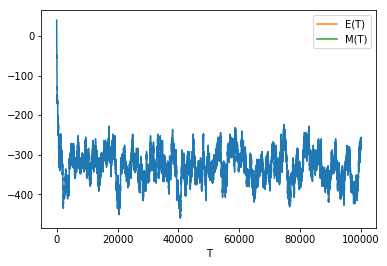

In [2]:
"""
Monte Carlo simulation of the 2D Ising model
"""

from scipy import *
# from scipy import weave
from pylab import *
import random
import numpy as np

Nitt = 100000  # total number of Monte Carlo steps
N = 20          # linear dimension of the lattice, lattice-size= N x N
warm = 1000     # Number of warmup steps
measure=100     # How often to take a measurement


def CEnergy(latt):
    "Energy of a 2D Ising lattice at particular configuration"
    Ene = 0
    for i in range(len(latt)):
        for j in range(len(latt)):
            S = latt[i,j]
            WF = latt[(i+1)%N, j] + latt[i,(j+1)%N] + latt[(i-1)%N,j] + latt[i,(j-1)%N]
            Ene += -WF*S # Each neighbor gives energy 1.0
    return Ene/2. # Each par counted twice

def RandomL(N):
    "Radom lattice, corresponding to infinite temerature"
    latt = zeros((N,N), dtype=int)
    for i in range(N):
        for j in range(N):
            latt[i,j] = sign(2*rand()-1)
    return latt

def SamplePython(Nitt, latt, PW):
    "Monte Carlo sampling for the Ising model in Pythons"
    Ene = CEnergy(latt)  # Starting energy
    Mn=sum(latt)         # Starting magnetization
    
    Naver=0       # Measurements
    Eaver=0.0
    Maver=0.0
    
    N2 = N*N
    
    Ene_all = np.arange(0,Nitt)
    for itt in range(Nitt):
        t = int(rand()*N2)  # choose one of N2 sites to flip
        (i,j) = (t % N, int(t/N) )
        S = latt[i,j]
        WF = latt[(i+1)%N, j] + latt[i,(j+1)%N] + latt[(i-1)%N,j] + latt[i,(j-1)%N]
        P = PW[4+S*WF]
        if P>rand(): # flip the spin
            latt[i,j] = -S
            Ene += 2*S*WF
            Mn -= 2*S
        
        Ene_all[itt] = Ene
        
        if itt>warm and itt%measure==0:
            Naver += 1
            Eaver += Ene
            Maver += Mn
    
    plt.plot(range(0,Nitt), Ene_all)
    
    return (Maver/Naver/N2, Eaver/Naver/N2)


# def SampleCPP(Nitt, latt, PW, T):
#     "The same Monte Carlo sampling in C++"
#     Ene = float(CEnergy(latt))  # Starting energy
#     Mn = float(sum(latt))       # Starting magnetization

#     # Measurements
#     aver = zeros(5,dtype=float) # contains: [Naver, Eaver, Maver]
    
#     code="""
#     using namespace std;
#     int N2 = N*N;
#     for (int itt=0; itt<Nitt; itt++){
#         int t = static_cast<int>(drand48()*N2);
#         int i = t % N;
#         int j = t / N;
#         int S = latt(i,j);
#         int WF = latt((i+1)%N, j) + latt(i,(j+1)%N) + latt((i-1+N)%N,j) + latt(i,(j-1+N)%N);
#         double P = PW(4+S*WF);
#         if (P > drand48()){ // flip the spin
#             latt(i,j) = -S;
#             Ene += 2*S*WF;
#             Mn -= 2*S;
#         }
#         if (itt>warm && itt%measure==0){
#             aver(0) += 1;
#             aver(1) += Ene;
#             aver(2) += Mn;
#             aver(3) += Ene*Ene;
#             aver(4) += Mn*Mn;
#         }
#     }
#     """
#     weave.inline(code, ['Nitt','latt','N','PW','Ene','Mn','warm', 'measure', 'aver'],
#                  type_converters=weave.converters.blitz, compiler = 'gcc')
#     aE = aver[1]/aver[0]
#     aM = aver[2]/aver[0]
#     cv = (aver[3]/aver[0]-(aver[1]/aver[0])**2)/T**2
#     chi = (aver[4]/aver[0]-(aver[2]/aver[0])**2)/T
#     return (aM, aE, cv, chi)


if __name__ == '__main__':
    
    latt = RandomL(N)
    PW = zeros(9, dtype=float)

    wT = linspace(3,1,1)
    wMag=[]
    wEne=[]
    wCv=[]
    wChi=[]
    for T in wT:
        print("T= ", T)
        
        # Precomputed exponents
        PW[4+4] = exp(-4.*2/T)
        PW[4+2] = exp(-2.*2/T)
        PW[4+0] = exp(0.*2/T)
        PW[4-2] = exp( 2.*2/T)
        PW[4-4] = exp( 4.*2/T)
    
        (maver, eaver) = SamplePython(Nitt, latt, PW)
        wMag.append(maver)
        wEne.append(eaver)
#         (aM, aE, cv, chi) = SampleCPP(Nitt, latt, PW, T)
#         wMag.append( aM/(N*N) )
#         wEne.append( aE/(N*N) )
#         wCv.append( cv/(N*N) )
#         wChi.append( chi/(N*N) )
        
#         print(T, aM/(N*N), aE/(N*N), cv/(N*N), chi/(N*N) )
        
    plot(wT, wEne, label='E(T)')
#     plot(wT, wCv, label='cv(T)')
    plot(wT, wMag, label='M(T)')
    xlabel('T')
    legend(loc='best')
    show()
#     plot(wT, wChi, label='chi(T)')
#     xlabel('T')
#     legend(loc='best')
#     show()
    